In [39]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
#reading the csv file
df = pd.read_csv("nyc_taxi_trip_duration.csv")
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [41]:
df["passenger_count"].value_counts()

1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
9         1
7         1
Name: passenger_count, dtype: int64

In [42]:
df = df.loc[~(df['passenger_count'] == 0)]
df = df.loc[~(df['passenger_count'] == 7)]
df = df.loc[~(df['passenger_count'] == 9)]

In [43]:
df['trip_duration_hour'] = df['trip_duration'].apply(lambda x: x/3600)
df.drop(columns=['trip_duration'], inplace=True)

In [44]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration_hour    float64
dtype: object

# KNN

In [45]:
custom_df = df.sample(50000)

In [46]:
sample_df = custom_df

In [47]:
#seperate features and target
features = sample_df.drop(["id","vendor_id","trip_duration_hour","pickup_datetime","dropoff_datetime","store_and_fwd_flag"],axis = 1)
target = sample_df["trip_duration_hour"]

In [48]:
sample_df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration_hour    float64
dtype: object

In [49]:
#converting the store and fwd flag to int type
sample_df["passenger_count"].value_counts()

1    35363
2     7316
5     2633
3     2051
6     1675
4      962
Name: passenger_count, dtype: int64

In [50]:
data = pd.concat([sample_df, pd.get_dummies(sample_df[['passenger_count']].astype('str'))], axis=1)
try:
    data.drop(['id','vendor_id','trip_duration_hour','pickup_datetime','dropoff_datetime','store_and_fwd_flag','passenger_count'], axis=1, inplace=True)
except KeyError:
    pass

data.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6
356487,-74.004028,40.719830,-73.990097,40.714020,0,0,0,0,0,1
479350,-73.978554,40.783077,-73.944283,40.792034,0,0,1,0,0,0
1173,-73.988174,40.723679,-74.001236,40.736893,1,0,0,0,0,0
523011,-73.975609,40.751972,-73.991249,40.750271,1,0,0,0,0,0
334449,-73.955811,40.771992,-73.991211,40.749889,1,0,0,0,0,0


In [51]:
#seperate features and target
x = data
y = sample_df["trip_duration_hour"]
x.shape,y.shape

((50000, 10), (50000,))

In [52]:
#scaling the data(using MinMax Scaler)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)


In [53]:
x = pd.DataFrame(x_scaled,columns=x.columns)
x.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6
0,0.388332,0.559608,0.879372,0.800831,0.0,0.0,0.0,0.0,0.0,1.0
1,0.427724,0.643678,0.886285,0.836528,0.0,0.0,1.0,0.0,0.0,0.0
2,0.412847,0.564724,0.877692,0.811297,1.0,0.0,0.0,0.0,0.0,0.0
3,0.432277,0.602332,0.879198,0.817418,1.0,0.0,0.0,0.0,0.0,0.0
4,0.462892,0.628943,0.879204,0.817244,1.0,0.0,0.0,0.0,0.0,0.0


In [54]:
#importing the train_test_split from sklearn
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state=56)

In [55]:
#importing knn regressor and mse metrics
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

In [67]:
#creating instance of KNN
reg = KNN(n_neighbors = 5)
#fitting the model
reg.fit(train_x,train_y)
#predicting over the train set and calculating F1
test_predict = reg.predict(test_x)
k= sqrt(mse(test_predict,test_y))
print("Test Mean Squared Error ", k)

Test Mean Squared Error  0.9389013824704585


In [57]:
def elbow(k):
    test_rmse=[]
    for i in k:
        reg = KNN(n_neighbors=i)
        reg.fit(train_x,train_y)
        tmp = reg.predict(test_x)
        tmp = sqrt(mse(tmp,test_y))
        test_rmse.append(tmp)
        
    return test_rmse    

In [58]:
k = range(1,50)

In [59]:
test = elbow(k)

Text(0.5, 1.0, 'elbow curve for test')

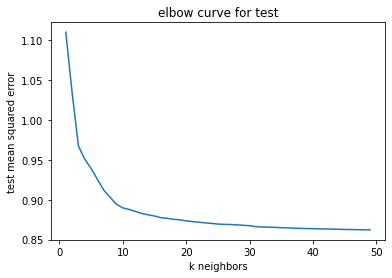

In [60]:
#plotting the curves
plt.plot(k,test)
plt.xlabel("k neighbors")
plt.ylabel("test mean squared error")
plt.title("elbow curve for test")

In [71]:
#creating instance of KNN
reg = KNN(n_neighbors = 10)
#fitting the model
reg.fit(train_x,train_y)
#predicting over the train set and calculating F1
test_predict = reg.predict(test_x)
k= sqrt(mse(test_predict,test_y))
print("Test Mean Squared Error ", k)

Test Mean Squared Error  0.8897387234605713


# The best value ok K is 10


In [72]:
knn_train_score = reg.score(train_x,train_y)
knn_train_score*100

13.953021230636375

In [73]:
knn_test_score = reg.score(test_x,test_y)
knn_test_score*100

-5.911639578977201

# Conclusion
1. The Test Root Mean Squared Error when K value is 5 is 0.9389013824704585
2. Using Elbow method we find the value of K to be 10
3. On using Elbow method we found that at k = 10 the test RMSE is lesser than the RMSE at K =5 which is why at K =10 the model gives better result
4. The Train score of the model is 13.953021230636375.
5. The Test score of the model is -5.911639578977201 which is not a good score.